<a id="6"></a>
<h2 style="background-color: #3498db; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Indie Flower', cursive; font-weight: bold; margin: 10px; border: 2px solid #2980b9; border-radius: 12px; padding: 15px;">Step 1. Imports</h2>


*   Import modules
*   Load dataframe



In [1]:
# Main Modules
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
import plotly.express as px
from matplotlib import pyplot as plt 

# Classifier Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  BernoulliNB
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Accuracy Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, log_loss, mean_absolute_error, mean_squared_error, r2_score

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = pd.concat([df,pd.read_csv(r'D:\test.csv')],axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['PassengerId'].describe()

count    1309.000000
mean      655.000000
std       378.020061
min         1.000000
25%       328.000000
50%       655.000000
75%       982.000000
max      1309.000000
Name: PassengerId, dtype: float64


## <p style="background-color: #e67e22; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Zilla Slab', serif; font-weight: bold; margin: 15px; border: 3px solid #d35400; border-radius: 15px; padding: 20px;">Step 2. Data Cleaning</p>

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers, consistency) 



In [5]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1.0,1,female,38.0,1,0,71.2833,C85,C
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,4,1.0,1,female,35.0,1,0,53.1000,C123,S
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 112.5+ KB


from the info we can conclude that we have 3 cols have nulls 

In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

In [10]:
index_lst = df[df['Survived'].isnull()].index

In [11]:
df.drop(index_lst,axis=0,inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
418,419,0.0,2,male,30.0,0,0,13.0000,NaN,S
419,420,0.0,3,female,10.0,0,2,24.1500,NaN,S
420,421,0.0,3,male,NaN,0,0,7.8958,NaN,C
421,422,0.0,3,male,21.0,0,0,7.7333,NaN,Q
422,423,0.0,3,male,29.0,0,0,7.8750,NaN,S


In [13]:
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198732
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Cabin          0.763214
Embarked       0.002114
dtype: float64

In [14]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
df[df['Embarked'].isnull()]='S'

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age             94
SibSp            0
Parch            0
Fare             0
Cabin          361
Embarked         0
dtype: int64

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
418,419,0.0,2,male,30.0,0,0,13.0,NaN,S
419,420,0.0,3,female,10.0,0,2,24.15,NaN,S
420,421,0.0,3,male,NaN,0,0,7.8958,NaN,C
421,422,0.0,3,male,21.0,0,0,7.7333,NaN,Q
422,423,0.0,3,male,29.0,0,0,7.875,NaN,S


In [18]:
x = df[df['Age'].notnull()]

In [19]:
df.drop('PassengerId',axis=1,inplace=True)

In [20]:
for col in df.columns:
    print(f'column {col} has unique values:')
    print(df[col].unique())
    print('-------------------------')

column Survived has unique values:
[0.0 1.0 'S']
-------------------------
column Pclass has unique values:
[2 3 1 'S']
-------------------------
column Sex has unique values:
['male' 'female' 'S']
-------------------------
column Age has unique values:
[30.0 10.0 nan 21.0 29.0 28.0 18.0 19.0 32.0 42.0 17.0 50.0 14.0 24.0 64.0
 31.0 45.0 20.0 25.0 4.0 13.0 34.0 5.0 52.0 36.0 49.0 65.0 48.0 47.0 38.0
 56.0 0.75 33.0 23.0 22.0 2.0 9.0 63.0 35.0 58.0 55.0 71.0 54.0 37.0 16.0
 26.0 44.0 40.5 39.0 7.0 11.0 8.0 27.0 62.0 40.0 53.0 60.0 61.0 57.0 80.0
 51.0 41.0 43.0 70.0 24.5 15.0 6.0 28.5 0.67 30.5 1.0 46.0 0.42 'S' 0.83
 34.5 74.0]
-------------------------
column SibSp has unique values:
[0 1 2 5 3 4 8 'S']
-------------------------
column Parch has unique values:
[0 2 1 3 4 5 6 'S']
-------------------------
column Fare has unique values:
[13.0 24.15 7.8958 7.7333 7.875 14.4 20.2125 7.25 26.0 7.75 8.05 26.55
 16.1 7.125 55.9 120.0 34.375 18.75 263.0 10.5 26.25 9.5 7.775 8.1125
 81.8583 1

In [21]:
df[ (df['Survived']=='S') ]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
829,S,S,S,S,S,S,S,S,S


In [22]:
df.drop(829,axis=0,inplace=True)

In [23]:
for col in df.columns:
    print(f'column {col} has unique values:')
    print(df[col].unique())
    print('-------------------------')

column Survived has unique values:
[0.0 1.0]
-------------------------
column Pclass has unique values:
[2 3 1]
-------------------------
column Sex has unique values:
['male' 'female']
-------------------------
column Age has unique values:
[30.0 10.0 nan 21.0 29.0 28.0 18.0 19.0 32.0 42.0 17.0 50.0 14.0 24.0 64.0
 31.0 45.0 20.0 25.0 4.0 13.0 34.0 5.0 52.0 36.0 49.0 65.0 48.0 47.0 38.0
 56.0 0.75 33.0 23.0 22.0 2.0 9.0 63.0 35.0 58.0 55.0 71.0 54.0 37.0 16.0
 26.0 44.0 40.5 39.0 7.0 11.0 8.0 27.0 62.0 40.0 53.0 60.0 61.0 57.0 80.0
 51.0 41.0 43.0 70.0 24.5 15.0 6.0 28.5 0.67 30.5 1.0 46.0 0.42 0.83 34.5
 74.0]
-------------------------
column SibSp has unique values:
[0 1 2 5 3 4 8]
-------------------------
column Parch has unique values:
[0 2 1 3 4 5 6]
-------------------------
column Fare has unique values:
[13.0 24.15 7.8958 7.7333 7.875 14.4 20.2125 7.25 26.0 7.75 8.05 26.55
 16.1 7.125 55.9 120.0 34.375 18.75 263.0 10.5 26.25 9.5 7.775 8.1125
 81.8583 19.5 19.2583 30.5 27.75 1

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 418 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  472 non-null    object
 1   Pclass    472 non-null    object
 2   Sex       472 non-null    object
 3   Age       378 non-null    object
 4   SibSp     472 non-null    object
 5   Parch     472 non-null    object
 6   Fare      472 non-null    object
 7   Cabin     111 non-null    object
 8   Embarked  472 non-null    object
dtypes: object(9)
memory usage: 36.9+ KB


In [25]:
df['Survived'] = df['Survived'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)
df['Age'] = df['Age'].astype(float)
df['SibSp'] = df['SibSp'].astype(int)
df['Parch'] = df['Parch'].astype(int)
df['Fare'] = df['Fare'].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 418 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  472 non-null    int32  
 1   Pclass    472 non-null    int32  
 2   Sex       472 non-null    object 
 3   Age       378 non-null    float64
 4   SibSp     472 non-null    int32  
 5   Parch     472 non-null    int32  
 6   Fare      472 non-null    float64
 7   Cabin     111 non-null    object 
 8   Embarked  472 non-null    object 
dtypes: float64(2), int32(4), object(3)
memory usage: 29.5+ KB


In [27]:
df.select_dtypes(include=np.number).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [28]:
df[df.select_dtypes(include=np.number).columns].corr()['Age']

Survived   -0.064943
Pclass     -0.392711
Age         1.000000
SibSp      -0.237702
Parch      -0.149556
Fare        0.113374
Name: Age, dtype: float64

In [29]:
from sklearn.neighbors import KNeighborsRegressor
features = ['Pclass', 'SibSp', 'Parch'] 
# Rows where 'Age' is not missing
train_data = df[df['Age'].notnull()]

# Rows where 'Age' is missing
predict_data = df[df['Age'].isnull()]

# Features and target for training
X_train = train_data[features]
y_train = train_data['Age']

# Features for prediction
X_predict = predict_data[features]

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_regressor.fit(X_train, y_train)

age_predictions = knn_regressor.predict(X_predict)

df.loc[df['Age'].isnull(), 'Age'] = age_predictions

In [30]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       361
Embarked      0
dtype: int64

In [31]:
x = df[df['Cabin'].isnull()]

In [32]:
x['Survived'].value_counts()

Survived
0    260
1    101
Name: count, dtype: int64

In [33]:
df.drop('Cabin' , axis=1 , inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
418,0,2,male,30.0,0,0,13.0000,S
419,0,3,female,10.0,0,2,24.1500,S
420,0,3,male,23.8,0,0,7.8958,C
421,0,3,male,21.0,0,0,7.7333,Q
422,0,3,male,29.0,0,0,7.8750,S


In [35]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [36]:
df.duplicated().sum()

44

In [37]:
df.drop_duplicates(keep='first',inplace=True)

In [38]:
df.duplicated().sum()

0

In [39]:
numerical_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(include='object').columns

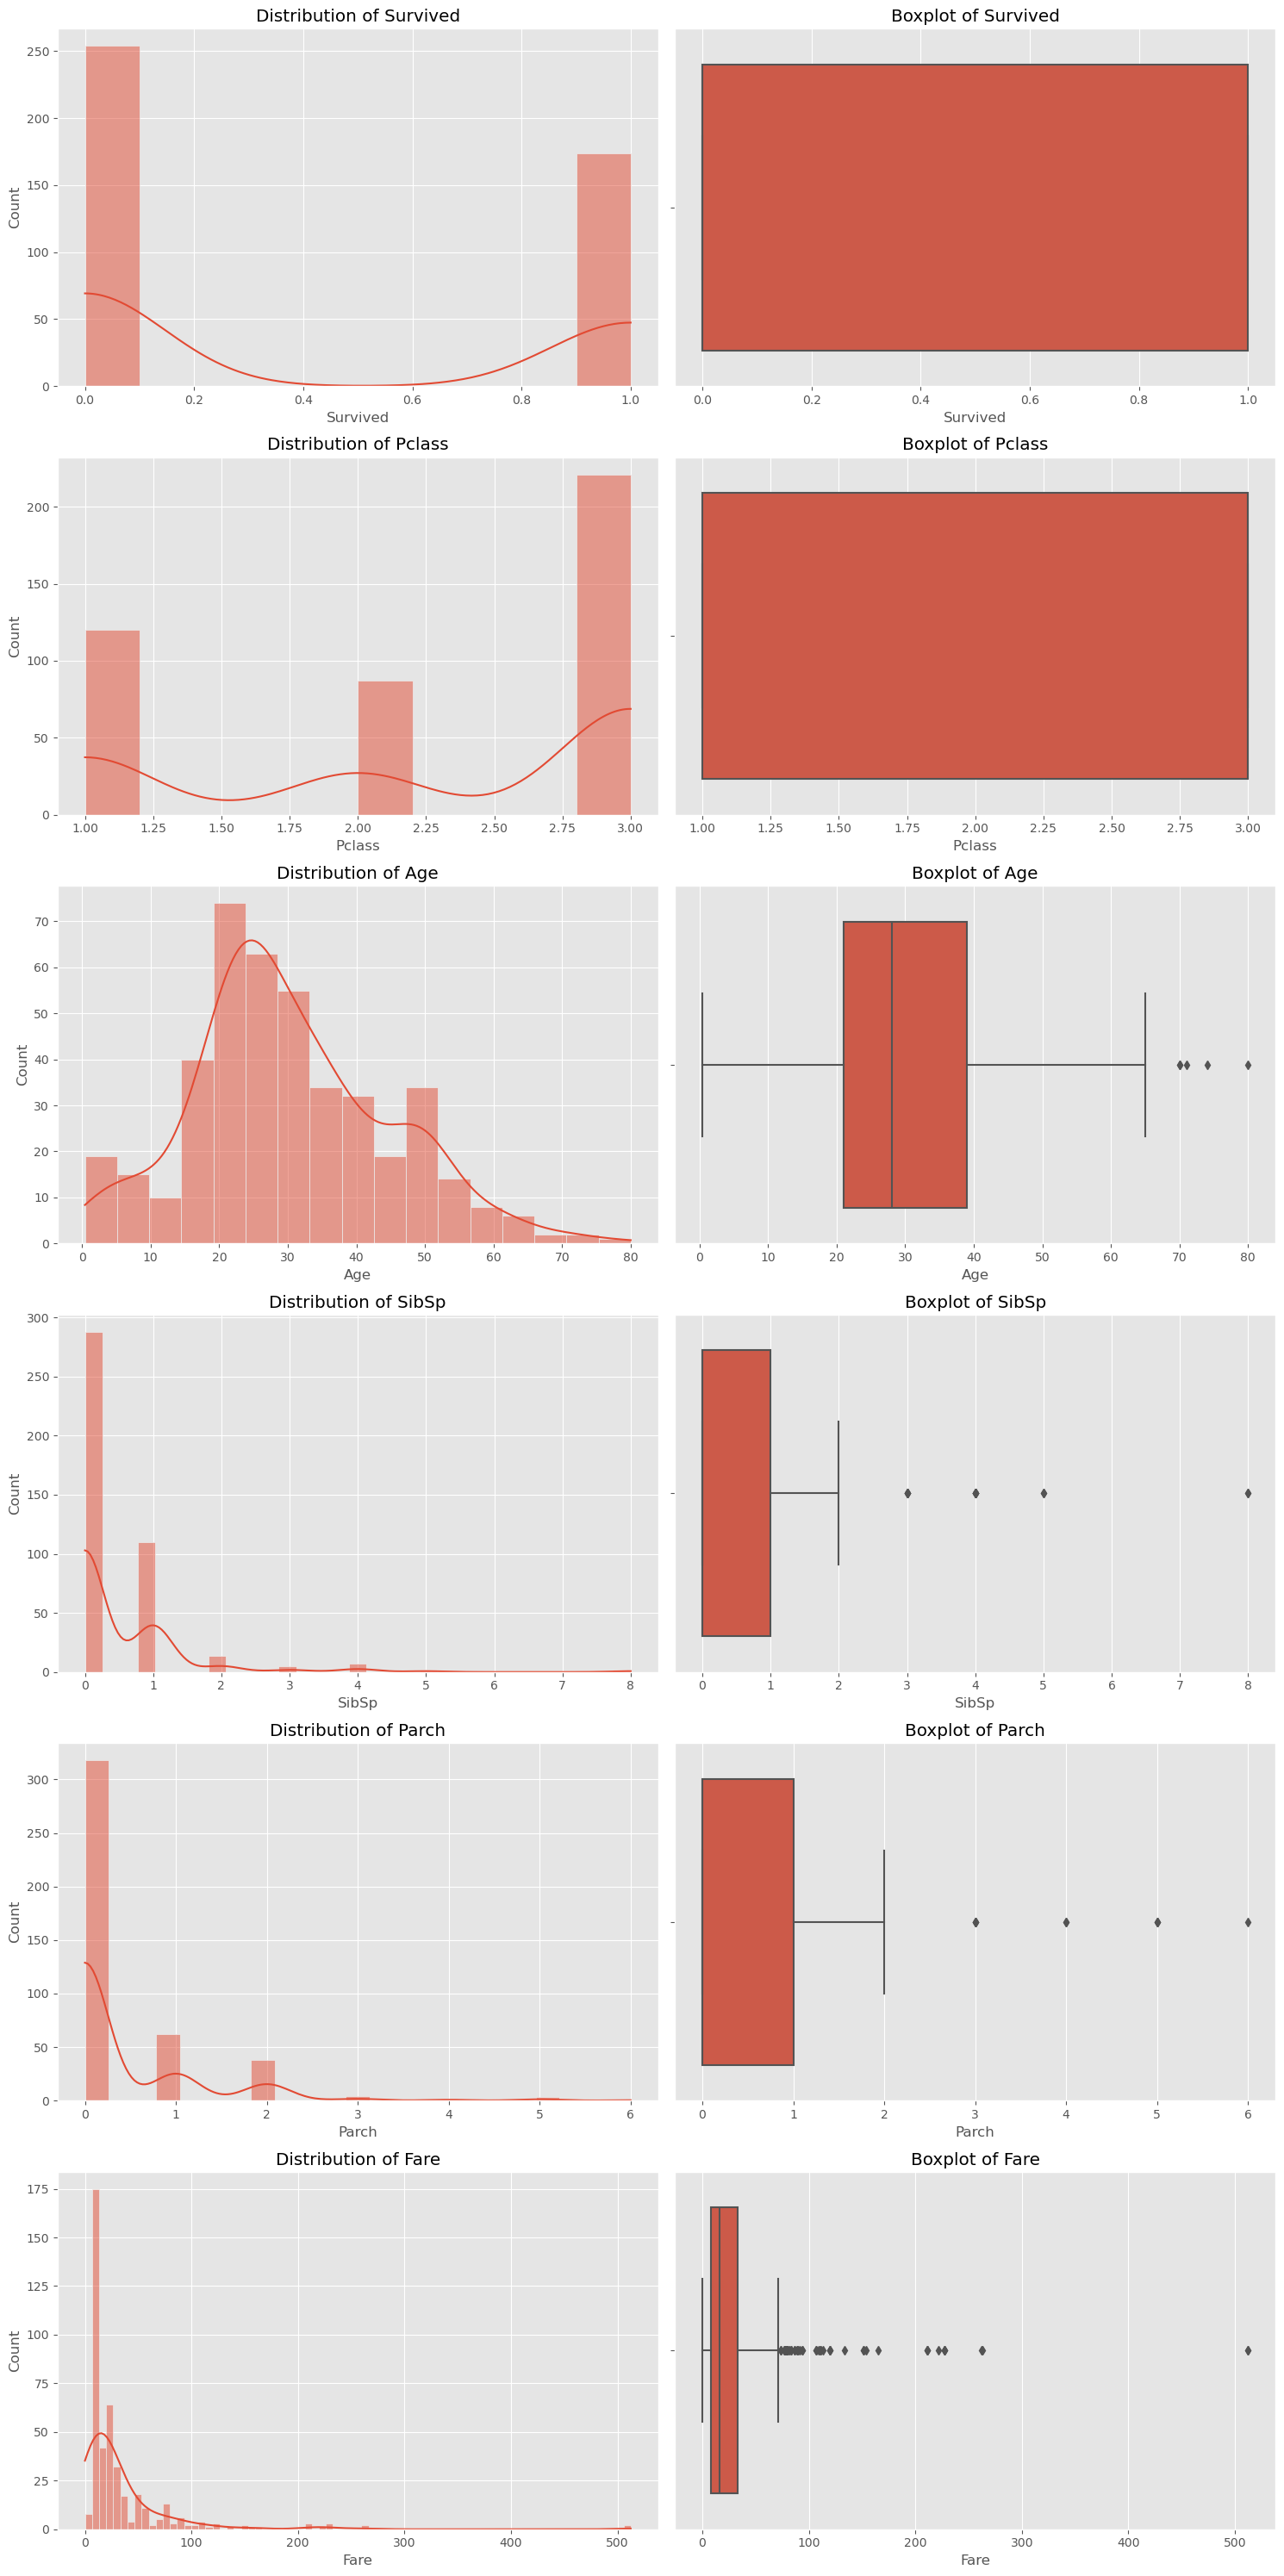

In [40]:
# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 5*len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Distplot with KDE
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

all numerical columns have outliers :)

In [41]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.406542,2.235981,30.314533,0.483645,0.418224,33.972128
std,0.491763,0.861845,14.398155,0.968939,0.863165,51.964502
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,16.100000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,33.255200
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df[df['Age']<1].index

Index([469, 755, 803, 831], dtype='int64')

In [43]:
df.drop([469, 755, 803, 831],axis=0,inplace=True)

In [44]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.400943,2.233491,30.594222,0.478774,0.412736,34.148693
std,0.490669,0.864160,14.173110,0.969766,0.865372,52.175907
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,16.100000
75%,1.000000,3.000000,39.000000,1.000000,0.250000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="10"></a>
<h1 style="background-color: #3498db; font-size: 20px; color: #ecf0f1; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold; margin: 10px; border: 1px solid; border-color: #2980b9; border-radius: 8px; padding: 15px;">Step 2. Data Exploration (Continue EDA)</h1>


Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
418,0,2,male,30.0,0,0,13.0000,S
419,0,3,female,10.0,0,2,24.1500,S
420,0,3,male,23.8,0,0,7.8958,C
421,0,3,male,21.0,0,0,7.7333,Q
422,0,3,male,29.0,0,0,7.8750,S


AttributeError: 'numpy.int32' object has no attribute 'startswith'

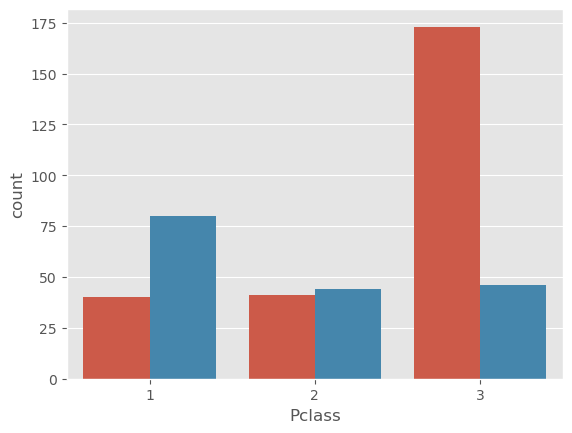

In [46]:
df['Pclass'] = df['Pclass'].astype(int)
df['Survived'] = df['Survived'].astype(int)
# Plot countplot
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Countplot of Pclass by Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


most people from Pclass 3 has been died 
most of people from Pclass 1 has been survived

In [47]:
df['Pclass'].corr(df['Survived'])

-0.4108715480997484

AttributeError: 'numpy.int32' object has no attribute 'startswith'

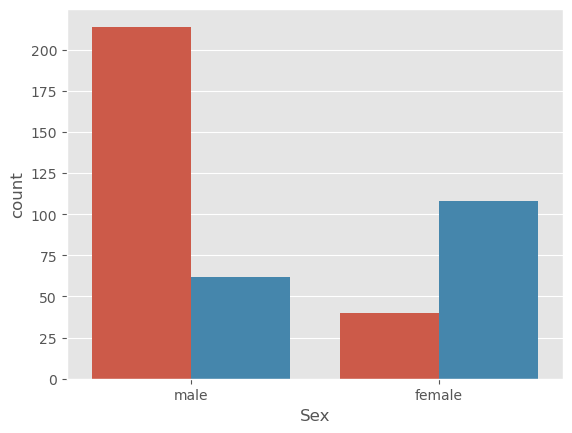

In [48]:
sns.countplot(data=df,x='Sex',hue='Survived')

as seem Most of people are men and most of the survived people are Female

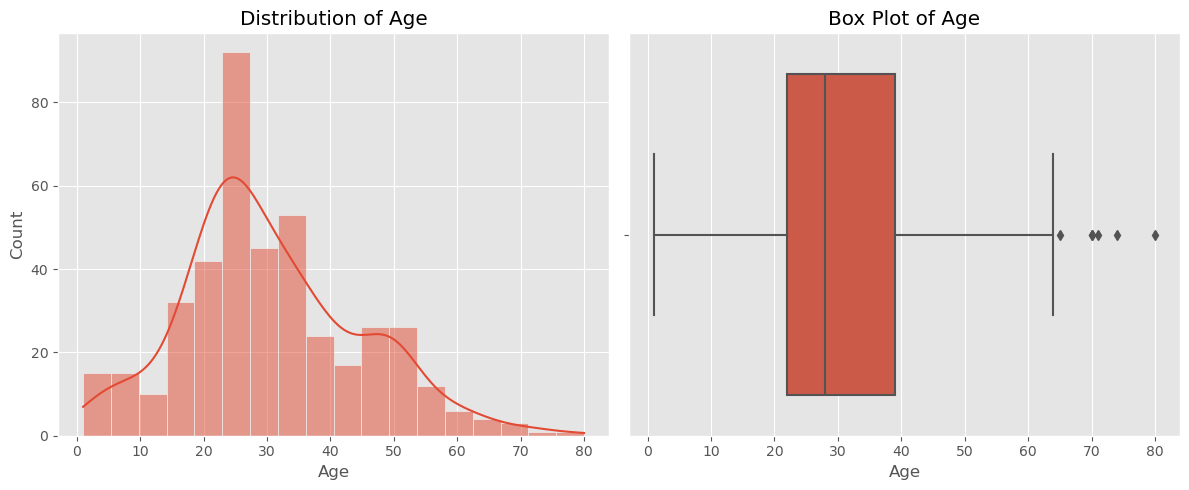

In [49]:
# Plotting
plt.figure(figsize=(12, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')

plt.tight_layout()
plt.show()

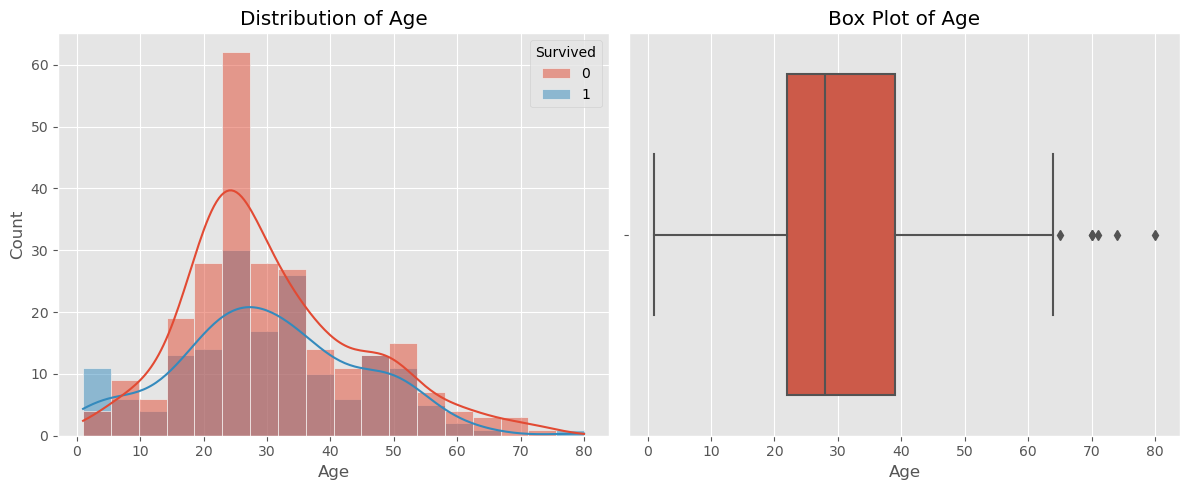

In [50]:
# Plotting
plt.figure(figsize=(12, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=df,x='Age', kde=True,hue='Survived')
plt.title('Distribution of Age')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='Age',hue='Survived')
plt.title('Box Plot of Age')

plt.tight_layout()
plt.show()

In [51]:
df['Age'].corr(df['Survived'])

-0.016731215355665015

as seen above there arenot any indicate from age graph that people with specific age survived or not :)

In [52]:
df['SibSp'].value_counts()

SibSp
0    287
1    108
2     13
4      7
3      5
5      2
8      2
Name: count, dtype: int64

Text(0.5, 0, 'Count')

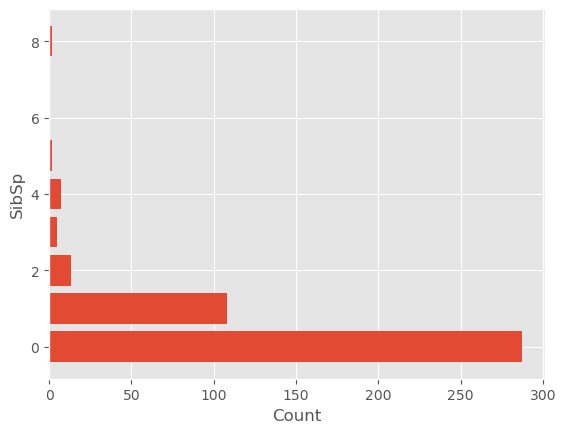

In [53]:
index = df['SibSp'].value_counts().index
value = df['SibSp'].value_counts().values 
plt.barh(index,value)
plt.ylabel('SibSp')
plt.xlabel('Count')

AttributeError: 'numpy.int32' object has no attribute 'startswith'

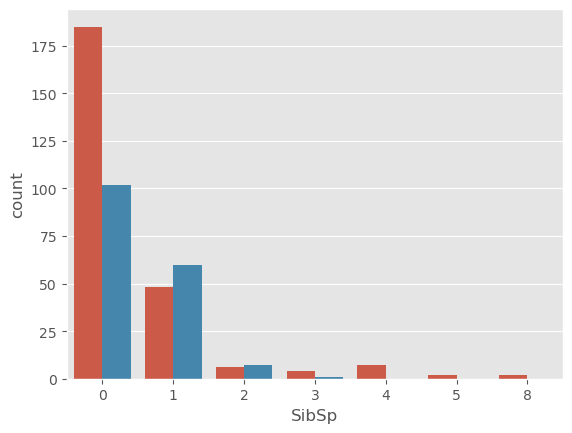

In [54]:
sns.countplot(data = df , x='SibSp' ,hue='Survived')

as seen most of poeple above 3 Died

AttributeError: 'numpy.int32' object has no attribute 'startswith'

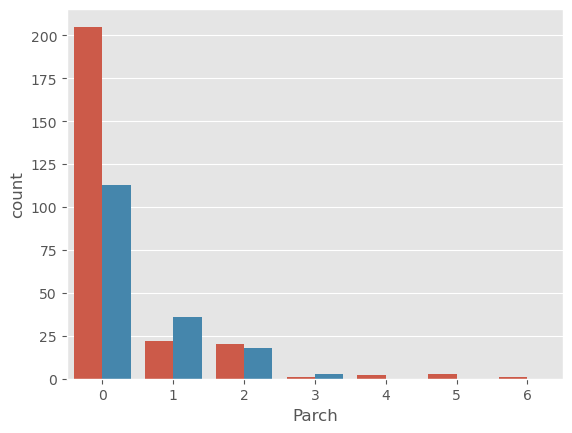

In [55]:
sns.countplot(data=df,x='Parch',hue='Survived')

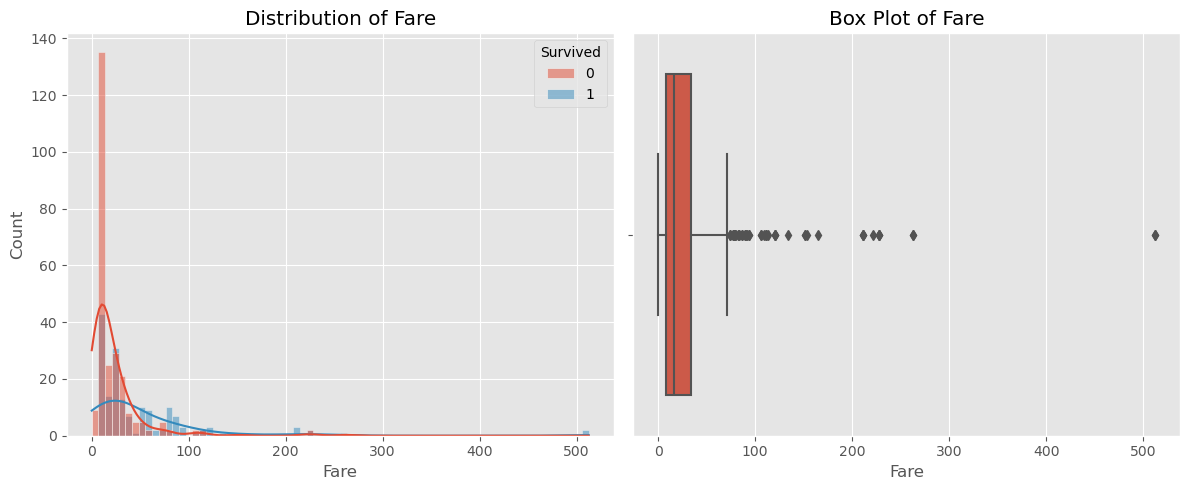

In [56]:
# Plotting
plt.figure(figsize=(12, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=df,x='Fare', kde=True,hue='Survived')
plt.title('Distribution of Fare')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='Fare',hue='Survived')
plt.title('Box Plot of Fare')

plt.tight_layout()
plt.show()

In [57]:
df['Fare'].corr(df['Survived'])

0.27549309968436014

AttributeError: 'numpy.int32' object has no attribute 'startswith'

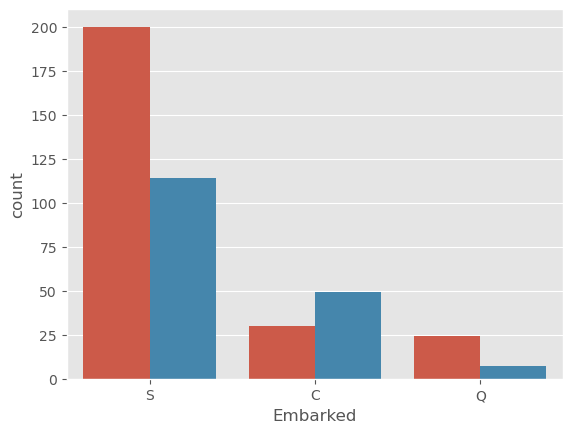

In [58]:
sns.countplot(data=df , x='Embarked' , hue='Survived')

as seen from graph S has been died (Most) & C has been survived (Most)

<a id="10"></a>
<h1 style="background-color: #3498db; font-size: 20px; color: #ecf0f1; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold; margin: 10px; border: 1px solid; border-color: #2980b9; border-radius: 8px; padding: 15px;">Step 2. Data Exploration (Continue EDA)</h1>


Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [59]:
df['Age'].corr(df['Survived'])

-0.016731215355665015

In [60]:
df.drop('Age',axis=1,inplace=True)

In [61]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
418,0,2,male,0,0,13.0000,False,True
419,0,3,female,0,2,24.1500,False,True
420,0,3,male,0,0,7.8958,False,False
421,0,3,male,0,0,7.7333,True,False
422,0,3,male,0,0,7.8750,False,True


In [62]:
df['Embarked_Q'] = df['Embarked_Q'].replace({True:1,False:0})

In [63]:
df['Embarked_S'] = df['Embarked_S'].replace({True:1,False:0})

In [64]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
418,0,2,male,0,0,13.0000,0,1
419,0,3,female,0,2,24.1500,0,1
420,0,3,male,0,0,7.8958,0,0
421,0,3,male,0,0,7.7333,1,0
422,0,3,male,0,0,7.8750,0,1


In [65]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
418,0,2,0,0,13.0000,0,1,True
419,0,3,0,2,24.1500,0,1,False
420,0,3,0,0,7.8958,0,0,True
421,0,3,0,0,7.7333,1,0,True
422,0,3,0,0,7.8750,0,1,True


In [66]:
df['Sex_male'] = df['Sex_male'].replace({True:1,False:0})

In [67]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
418,0,2,0,0,13.0000,0,1,1
419,0,3,0,2,24.1500,0,1,0
420,0,3,0,0,7.8958,0,0,1
421,0,3,0,0,7.7333,1,0,1
422,0,3,0,0,7.8750,0,1,1


<Axes: >

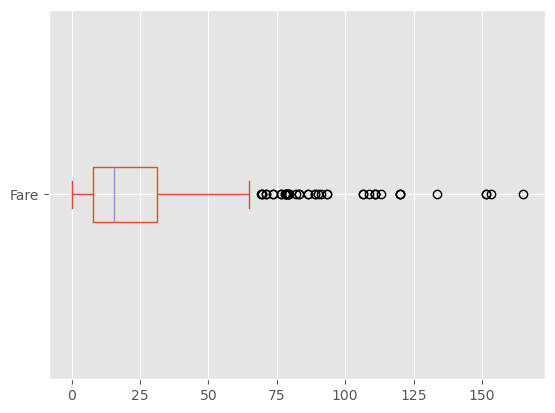

In [68]:
df = df[ df['Fare']<200 ]
df['Fare'].plot(kind='box',vert=False)

<Axes: xlabel='Fare', ylabel='Density'>

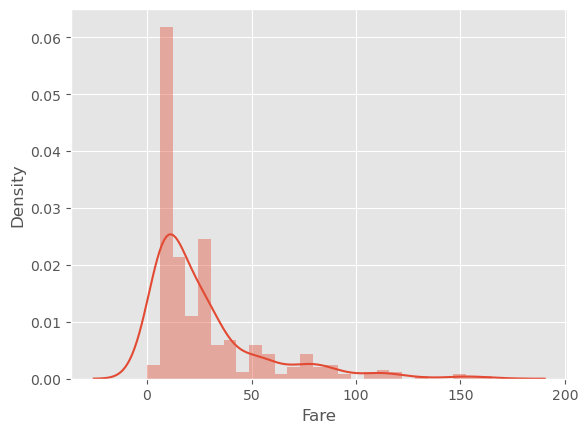

In [69]:
sns.distplot(df['Fare'])

In [70]:
df['Fare'].describe()

count    413.000000
mean      27.580256
std       28.317530
min        0.000000
25%        7.925000
50%       15.550000
75%       31.275000
max      164.866700
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

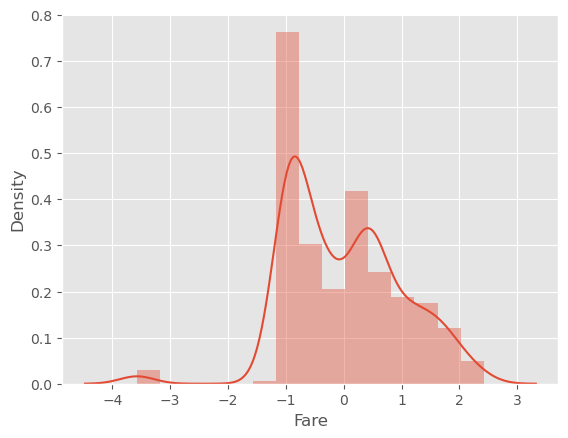

In [71]:
from sklearn.preprocessing import PowerTransformer
transform=PowerTransformer(standardize=True)
df['Fare']=transform.fit_transform(df['Fare'].values.reshape(-1,1))
sns.distplot(df['Fare'])

In [72]:
df['Fare'].skew()

-0.00475224743614123

In [73]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
count,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000,413.000000,413.000000
mean,0.392252,2.266344,0.481840,0.401937,-6.795748e-16,0.075061,0.748184,0.656174
std,0.488845,0.851472,0.976811,0.852293,1.001213e+00,0.263809,0.434583,0.475560
min,0.000000,1.000000,0.000000,0.000000,-3.573055e+00,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,-9.066212e-01,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,-1.819609e-01,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,5.885554e-01,0.000000,1.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,2.420134e+00,1.000000,1.000000,1.000000


In [74]:
df.corr()

,Survived,Pclass,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
Survived,1.000000,-0.403217,-0.020627,0.063419,0.376481,-0.097113,-0.116602,-0.483404
Pclass,-0.403217,1.000000,0.046685,0.052801,-0.638853,0.234947,0.043946,0.106821
SibSp,-0.020627,0.046685,1.000000,0.381964,0.353778,-0.074759,0.080684,-0.154549
Parch,0.063419,0.052801,0.381964,1.000000,0.329538,-0.037351,0.011805,-0.346876
Fare,0.376481,-0.638853,0.353778,0.329538,1.000000,-0.192725,-0.074028,-0.268883
Embarked_Q,-0.097113,0.234947,-0.074759,-0.037351,-0.192725,1.000000,-0.491034,-0.045299
Embarked_S,-0.116602,0.043946,0.080684,0.011805,-0.074028,-0.491034,1.000000,0.061565
Sex_male,-0.483404,0.106821,-0.154549,-0.346876,-0.268883,-0.045299,0.061565,1.000000


<a id="10"></a>
<h1 style="background-color: #3498db; font-size: 20px; color: #ecf0f1; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold; margin: 10px; border: 1px solid; border-color: #2980b9; border-radius: 8px; padding: 15px;">Step 2. Data Splitting (Continue EDA)</h1>


Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [75]:
from sklearn.model_selection import train_test_split
x = df.drop('Survived',axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [76]:
x_train.shape

(309, 7)

In [78]:
x_test.shape

(104, 7)

<a id="10"></a>
<h1 style="background-color: #3498db; font-size: 20px; color: #ecf0f1; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold; margin: 10px; border: 1px solid; border-color: #2980b9; border-radius: 8px; padding: 15px;">Step 4. Modeling </h1>


Begin by understanding how many employees left and what percentage of all employees this figure represents.

## *Logistic Regression*

In [80]:
from sklearn.model_selection import GridSearchCV
# Define the model
logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # note: 'elasticnet' requires 'solver' to be 'saga'
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

In [81]:
best_params

{'C': 0.0001, 'penalty': 'none', 'solver': 'newton-cg'}

In [82]:
log_reg = LogisticRegression(**best_params)
log_reg.fit(x_train,y_train)

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [84]:
y_pred = log_reg.predict(x_test)
print(f'The score of the train is {log_reg.score(x_train,y_train)}')
print(f'The score of the test is {log_reg.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.8090614886731392
The score of the test is 0.75
f1_score is 0.6176470588235293
precision_score 0.6363636363636364
Recall score 0.6


## *KNN*

In [87]:
# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 16),
    'weights': ['uniform', 'distance'],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best scorenb 
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters: {'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation accuracy: 0.7800105764145954


In [100]:
knn = KNeighborsClassifier(n_neighbors=11,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [101]:
y_pred = knn.predict(x_test)
print(f'The score of the train is {knn.score(x_train,y_train)}')
print(f'The score of the test is {knn.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.9288025889967637
The score of the test is 0.7307692307692307
f1_score is 0.6216216216216216
precision_score 0.5897435897435898
Recall score 0.6571428571428571


Overfitting

## *SVC*

In [110]:
svc = SVC(C=0.1,kernel='linear',random_state=101)
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.75

In [111]:
y_pred = svc.predict(x_test)
print(f'The score of the train is {svc.score(x_train,y_train)}')
print(f'The score of the test is {svc.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.7799352750809061
The score of the test is 0.75
f1_score is 0.6176470588235293
precision_score 0.6363636363636364
Recall score 0.6


## *DecisionTree*

In [113]:
# Define the model
dt = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 4}
Best cross-validation accuracy: 0.8218931782125859


In [114]:
DT  = DecisionTreeClassifier(**best_params)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=9,
                       min_samples_split=4)

In [115]:
y_pred = DT.predict(x_test)
print(f'The score of the train is {DT.score(x_train,y_train)}')
print(f'The score of the test is {DT.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.8381877022653722
The score of the test is 0.75
f1_score is 0.606060606060606
precision_score 0.6451612903225806
Recall score 0.5714285714285714


## *RandomForest*

In [116]:
# Define the model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.8285034373347436


In [117]:
RF = RandomForestClassifier(**best_params)
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [118]:
y_pred = RF.predict(x_test)
print(f'The score of the train is {RF.score(x_train,y_train)}')
print(f'The score of the test is {RF.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.8802588996763754
The score of the test is 0.7596153846153846
f1_score is 0.647887323943662
precision_score 0.6388888888888888
Recall score 0.6571428571428571


## *XGBoost*

In [120]:
# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation accuracy: 0.8091485986250662


In [122]:
xgb = XGBClassifier(**best_params)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [124]:
y_pred = xgb.predict(x_test)
print(f'The score of the train is {xgb.score(x_train,y_train)}')
print(f'The score of the test is {xgb.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.8349514563106796
The score of the test is 0.7692307692307693
f1_score is 0.6363636363636364
precision_score 0.6774193548387096
Recall score 0.6


## *CatBoost*

In [126]:
# Define the model
catboost_model = CatBoostClassifier(silent=True)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters for CatBoost: {best_params}")
print(f"Best cross-validation accuracy for CatBoost: {best_score}")


Best parameters for CatBoost: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Best cross-validation accuracy for CatBoost: 0.8090428344791114


In [128]:
catboost = CatBoostClassifier(**best_params)
catboost.fit(x_train,y_train)

0:	learn: 0.6632573	total: 1.61ms	remaining: 159ms
1:	learn: 0.6329091	total: 3.37ms	remaining: 165ms
2:	learn: 0.6077199	total: 4.89ms	remaining: 158ms
3:	learn: 0.5887358	total: 6.38ms	remaining: 153ms
4:	learn: 0.5705084	total: 7.73ms	remaining: 147ms
5:	learn: 0.5528445	total: 9.17ms	remaining: 144ms
6:	learn: 0.5385119	total: 10.2ms	remaining: 136ms
7:	learn: 0.5256555	total: 11.7ms	remaining: 135ms
8:	learn: 0.5138729	total: 13.2ms	remaining: 133ms
9:	learn: 0.5028575	total: 14.8ms	remaining: 133ms
10:	learn: 0.4938102	total: 16ms	remaining: 129ms
11:	learn: 0.4861600	total: 17.5ms	remaining: 128ms
12:	learn: 0.4791340	total: 19.1ms	remaining: 128ms
13:	learn: 0.4718773	total: 19.8ms	remaining: 121ms
14:	learn: 0.4655951	total: 21.2ms	remaining: 120ms
15:	learn: 0.4598661	total: 22.6ms	remaining: 119ms
16:	learn: 0.4560325	total: 23.3ms	remaining: 114ms
17:	learn: 0.4499933	total: 24.7ms	remaining: 113ms
18:	learn: 0.4452409	total: 26.3ms	remaining: 112ms
19:	learn: 0.4416386	tot

In [129]:
y_pred = catboost.predict(x_test)
print(f'The score of the train is {catboost.score(x_train,y_train)}')
print(f'The score of the test is {catboost.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.8737864077669902
The score of the test is 0.7307692307692307
f1_score is 0.588235294117647
precision_score 0.6060606060606061
Recall score 0.5714285714285714


## *Light_GBT*

In [131]:
# Define the model
lgb_model = LGBMClassifier()

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters for LightGBM: {best_params}")
print(f"Best cross-validation accuracy for LightGBM: {best_score}")


[LightGBM] [Info] Number of positive: 127, number of negative: 182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 309, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411003 -> initscore=-0.359820
[LightGBM] [Info] Start training from score -0.359820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [132]:
lgb_model = LGBMClassifier(**best_params)
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 127, number of negative: 182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 309, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411003 -> initscore=-0.359820
[LightGBM] [Info] Start training from score -0.359820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(learning_rate=0.01, n_estimators=500)

In [133]:
y_pred = lgb_model.predict(x_test)
print(f'The score of the train is {lgb_model.score(x_train,y_train)}')
print(f'The score of the test is {lgb_model.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.8673139158576052
The score of the test is 0.7403846153846154
f1_score is 0.608695652173913
precision_score 0.6176470588235294
Recall score 0.6


## *NaiveBayes*

In [134]:
# Define the model
nb_model = BernoulliNB()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    'binarize': [0.0, 0.5, 1.0, 1.5, 2.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters for BernoulliNB: {best_params}")
print(f"Best cross-validation accuracy for BernoulliNB: {best_score}")


Best parameters for BernoulliNB: {'alpha': 0.01, 'binarize': 0.5}
Best cross-validation accuracy for BernoulliNB: 0.7508725542041249


In [136]:
NB = BernoulliNB(**best_params)
NB.fit(x_train,y_train)

BernoulliNB(alpha=0.01, binarize=0.5)

In [138]:
y_pred = NB.predict(x_test)
print(f'The score of the train is {NB.score(x_train,y_train)}')
print(f'The score of the test is {NB.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.7702265372168284
The score of the test is 0.6826923076923077
f1_score is 0.5925925925925927
precision_score 0.5217391304347826
Recall score 0.6857142857142857


## *AdaBoost*

In [139]:
# Define the model
adaboost_model = AdaBoostClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters for AdaBoost: {best_params}")
print(f"Best cross-validation accuracy for AdaBoost: {best_score}")


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation accuracy for AdaBoost: 0.7961396086726598


In [140]:
adaboost = AdaBoostClassifier(**best_params)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [141]:
y_pred = adaboost.predict(x_test)
print(f'The score of the train is {adaboost.score(x_train,y_train)}')
print(f'The score of the test is {adaboost.score(x_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.8155339805825242
The score of the test is 0.75
f1_score is 0.6388888888888888
precision_score 0.6216216216216216
Recall score 0.6571428571428571
